/Users/student/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/student/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/student/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn


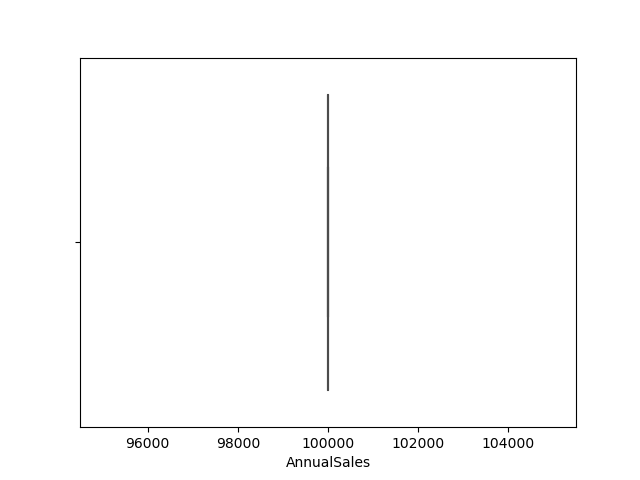
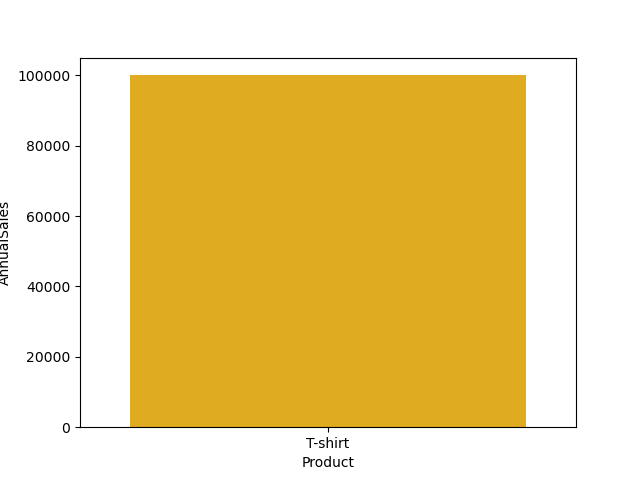
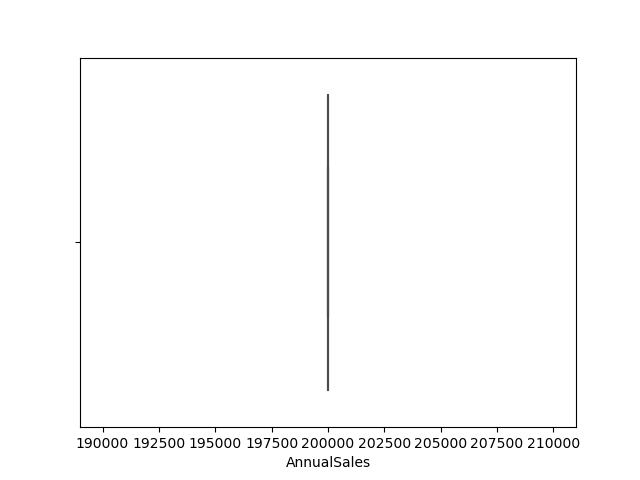
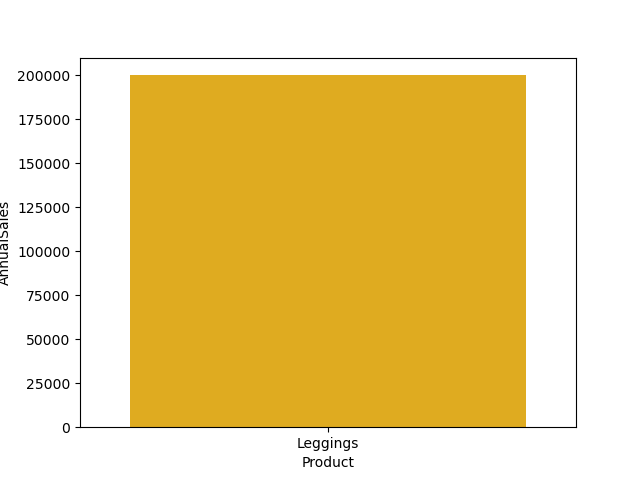
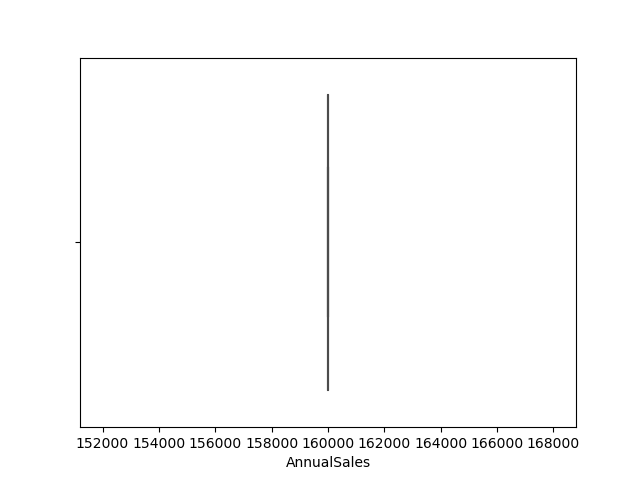
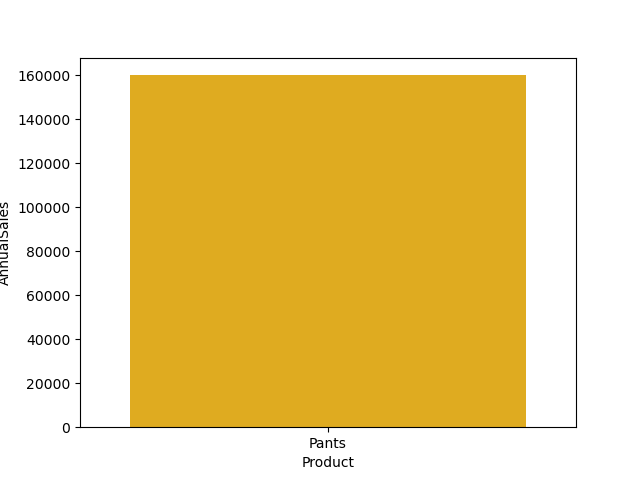
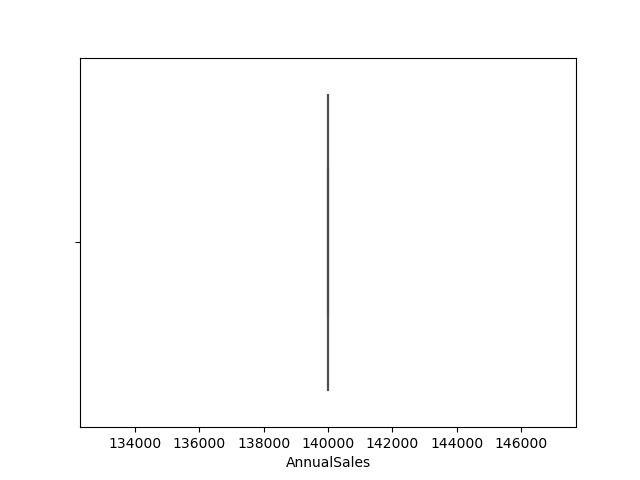
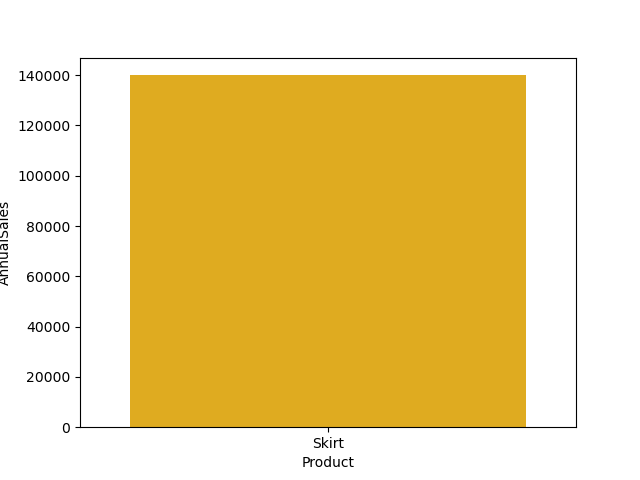
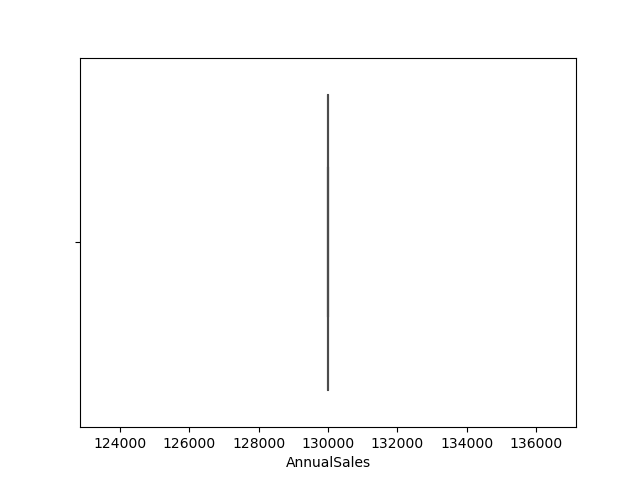
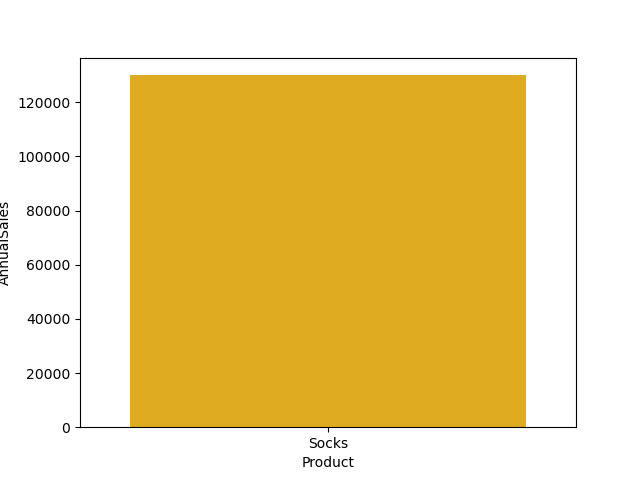
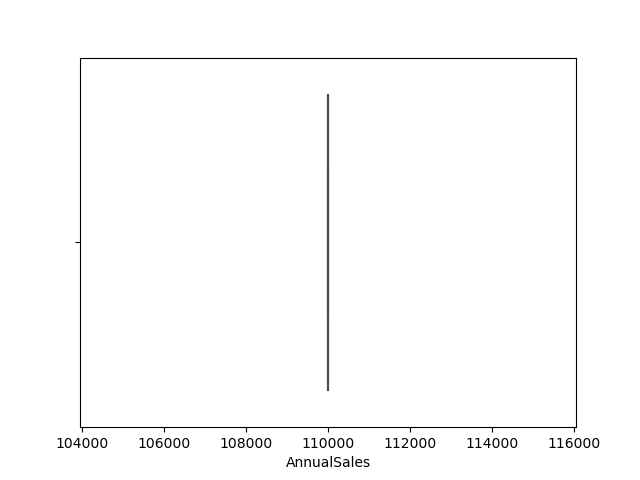
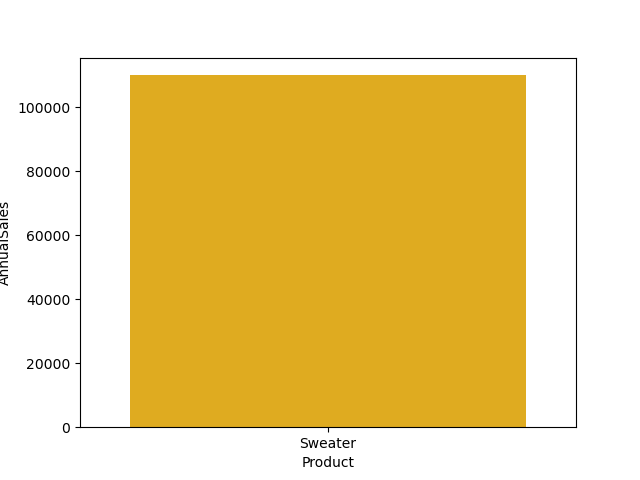
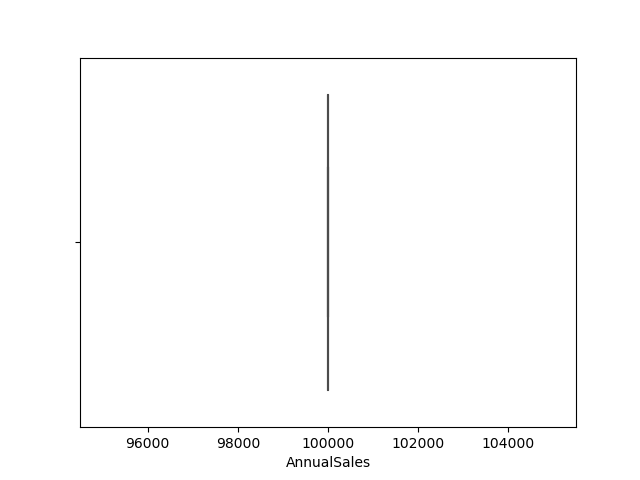
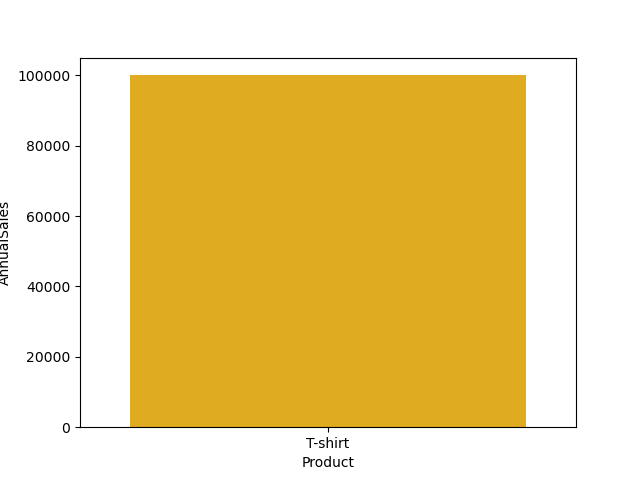
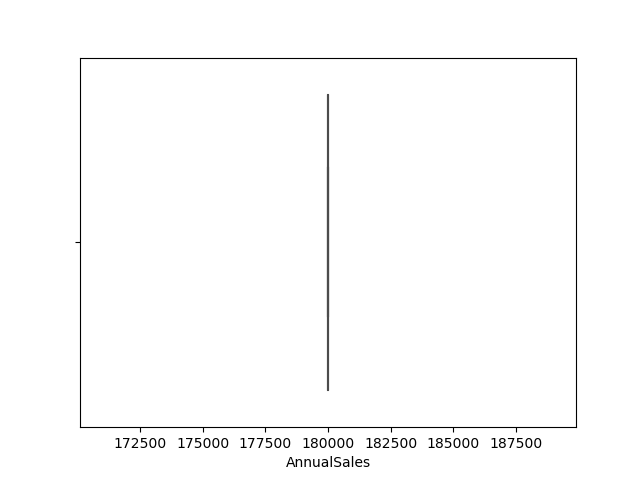
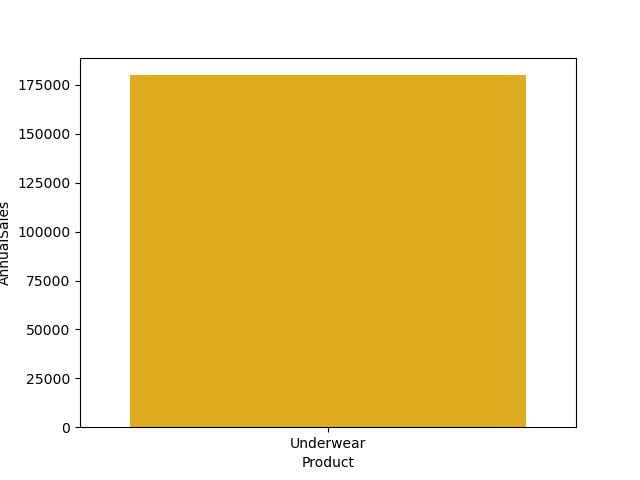

In [13]:
import param
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import panel as pn

pn.extension()

%matplotlib inline

df = pd.DataFrame({'Product':['T-shirt', 'Sweater', 'Socks', 'Skirt', 'Pants', 'Underwear', 'Leggings'], 
                   'AnnualSales':[100000, 110000, 130000, 140000, 160000, 180000, 200000]})

class AnnualSalesDashboard(param.Parameterized):
    
    Year = param.ObjectSelector(default='T-shirt', objects=list(df.Product.unique()))
    
    def get_data(self):
        class_df = df[(df.Product==self.Year)].copy()
        return class_df
    
    def box_view(self):
        data = self.get_data() 
        ax = sns.boxplot(data['AnnualSales'])
        plt.close()
        return ax.figure
    
    def table_view(self):
        data = self.get_data()
        return data
    
    def bar_view(self):
        palette = ['#FFB900', '#D52B1E', '#7FBA00', '#009CDF', '#F743B7']
        sns.set_palette(palette)
        data = self.get_data() 
        ax = sns.barplot(x='Product', y='AnnualSales', data=data, palette=palette)
        plt.close()
        return ax.figure

# create an instance of the class
asd = AnnualSalesDashboard(name='')

# create a title for the dashboard
dashboard_title = '# Annual Sales Dashboard'

# create some text describing the dashboard
dashboard_desc = 'An example of a simple interactive HoloViz Panel dashboard using a dummy data set of annual sales.'


dashboard = pn.Column(dashboard_title, 
                      dashboard_desc,   
                      asd.param,       
                      asd.box_view,    
                      asd.table_view,
                      asd.bar_view
                     )

dashboard.embed(max_opts = 5)
